In [1]:
from Benchmarking.Quora import QuoraData
import matplotlib.pyplot as plt
from sklearn import svm
from Benchmarking.Quora import QuoraData
import pandas as pd
import numpy as np

In [2]:
q = QuoraData(train=pd.read_excel("data/quora-question-pairs/preprocessed_data/train.xlsx"),test=pd.read_excel("data/quora-question-pairs/preprocessed_data/test.xlsx"))

In [3]:
q.data.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,question1_preprocessed,question2_preprocessed,stsb-mpnet-base-v2,all-mpnet-base-v2,stsb-distilroberta-base-v2,all-distilroberta-v1,cross-encoder/stsb-distilroberta-base
0,27280,27280,50691,50692,Are team collaboration software user friendly?,Is the team collaboration software user friendly?,1,are team collaboration software user friendly,is the team collaboration software user friendly,0.956065,0.919743,0.949324,0.968178,0.971520
1,385176,385176,353405,414169,Which SBI credit card is best?,Which credit card of SBI is best?,1,which sbi credit card is best,which credit card of sbi is best,0.971163,0.975300,0.978546,0.987728,0.988179
2,193900,193900,293957,293958,Has anyone ever won MVP and Defensive Player o...,Who will be the best player in the NBA in ten ...,0,has anyone ever won mvp and defensive player o...,who will be the best player in the nba in ten ...,0.447850,0.394794,0.403535,0.357620,0.309268
3,129696,129696,208288,208289,Are nutrilite products over priced?,Are Amway nutrilite products worth their price...,0,are nutrilite products over priced,are amway nutrilite products worth their price...,0.746799,0.793144,0.806372,0.758941,0.598630
4,363109,363109,274005,493065,Which one is better computer science or comput...,Which is better: mechanical or computer science?,0,which one is better computer science or comput...,which is better mechanical or computer science,0.811784,0.760864,0.677234,0.760568,0.773279


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='cross-encoder/stsb-distilroberta-base', ylabel='Count'>

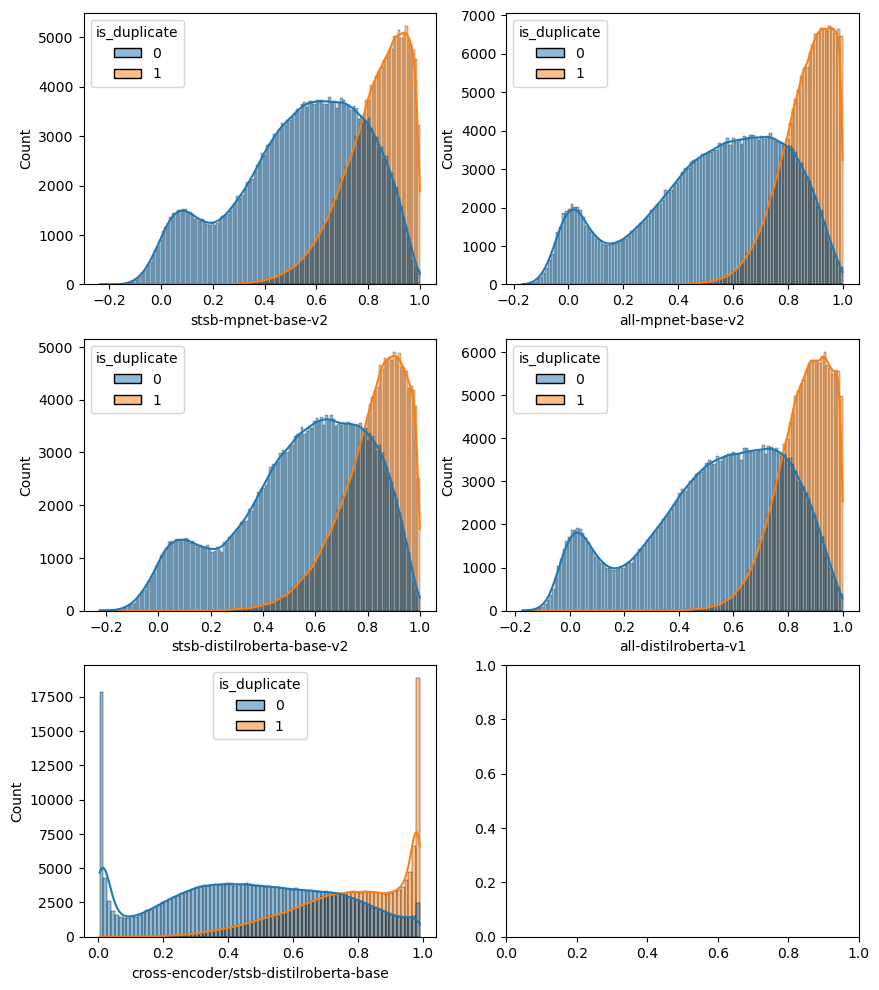

In [5]:
models=['stsb-mpnet-base-v2', 'all-mpnet-base-v2', 'stsb-distilroberta-base-v2', 'all-distilroberta-v1', 'cross-encoder/stsb-distilroberta-base']
#models = ['similarity: '+ model for model in models]
fig,axs = plt.subplots(3,2, figsize = (10,12))
sns.histplot(data=q.data, x='stsb-mpnet-base-v2',hue='is_duplicate',kde=True,ax=axs[0,0])
sns.histplot(data=q.data, x='all-mpnet-base-v2',hue='is_duplicate', kde=True,ax=axs[0,1])
sns.histplot(data=q.data, x='stsb-distilroberta-base-v2',hue='is_duplicate', kde=True, ax=axs[1,0])
sns.histplot(data=q.data, x='all-distilroberta-v1',hue='is_duplicate', kde=True, ax=axs[1,1])
sns.histplot(data=q.data, x='cross-encoder/stsb-distilroberta-base',hue='is_duplicate',kde=True, ax=axs[2,0])



In [25]:
pd.set_option('display.max_colwidth', None)
false_negatives = q.data[q.data['stsb-mpnet-base-v2']>0.9]
false_negatives = false_negatives[false_negatives['is_duplicate'] ==0]
drop_cols = [mod for mod in models if mod != 'stsb-mpnet-base-v2']
drop_cols += ['Unnamed: 0','id','qid1','qid2']
false_negatives.drop(columns=drop_cols)

,question1,question2,is_duplicate,question1_preprocessed,question2_preprocessed,stsb-mpnet-base-v2
18,"Why are microwaves called ""microwaves""?","Why are microwave ovens called ""microwaves""?",0,why are microwaves called microwaves,why are microwave ovens called microwaves,0.971198
43,How long does it take to answer a question on Quora?,How long does it take for questions to be answered on Quora?,0,how long does it take to answer a question on quora,how long does it take for questions to be answered on quora,0.981782
132,Is it really possible to switch from a service based company to a product based company?,Is it possible to switch from a service based company to a product based company?,0,is it really possible to switch from a service based company to a product based company,is it possible to switch from a service based company to a product based company,0.963036
153,What is best Linux operating system for beginners?,What's the best Linux operating System distro for beginners?,0,what is best linux operating system for beginners,what s the best linux operating system distro for beginners,0.978914
160,Where does WhatsApp get revenue from?,What is WhatsApp's source of revenue?,0,where does whatsapp get revenue from,what is whatsapp s source of revenue,0.952568
...,...,...,...,...,...,...
121163,What are the career scope in information technology?,What are the career opporunities in information technology?,0,what are the career scope in information technology,what are the career opporunities in information technology,0.947019
121218,What I can sell on amazon.in?,What can I sell on Amazon?,0,what i can sell on amazon in,what can i sell on amazon,0.948759
121225,How often does Richard Muller read books?,How does Richard Muller read books?,0,how often does richard muller read books,how does richard muller read books,0.912437
121242,How do I get low CPU usage in a free hosting service like a web host?,How do I get low CPU usage in a free hosting service like a web host in cpanel?,0,how do i get low cpu usage in a free hosting service like a web host,how do i get low cpu usage in a free hosting service like a web host in cpanel,0.923886


In [7]:
len(false_negatives)/len(q.data)

0.028402879121422742

In [10]:
pd.set_option('display.max_colwidth', None)
false_negatives = q.data[q.data['cross-encoder/stsb-distilroberta-base']>0.9]
false_negatives = false_negatives[false_negatives['is_duplicate'] ==0]
drop_cols = [mod for mod in models if mod != 'cross-encoder/stsb-distilroberta-base']
drop_cols += ['Unnamed: 0','id','qid1','qid2','question1','question2']
false_negatives.drop(columns=drop_cols)

,is_duplicate,question1_preprocessed,question2_preprocessed,cross-encoder/stsb-distilroberta-base
36,0,how do i find out who hacked my whatsapp,how do i know if my whatsapp account has been hacked,0.912108
43,0,how long does it take to answer a question on quora,how long does it take for questions to be answered on quora,0.987529
132,0,is it really possible to switch from a service based company to a product based company,is it possible to switch from a service based company to a product based company,0.986256
153,0,what is best linux operating system for beginners,what s the best linux operating system distro for beginners,0.925320
160,0,where does whatsapp get revenue from,what is whatsapp s source of revenue,0.959433
...,...,...,...,...
121163,0,what are the career scope in information technology,what are the career opporunities in information technology,0.918789
121216,0,how should i start to become a good content writer,how do i become a content writer,0.958434
121218,0,what i can sell on amazon in,what can i sell on amazon,0.967374
121225,0,how often does richard muller read books,how does richard muller read books,0.979574


In [9]:
len(false_negatives)/len(q.data)

0.030673526429048456

In [11]:
from model_utils import SentenceSimilarityModel

In [19]:
SSM = SentenceSimilarityModel('stsb-mpnet-base-v2')

In [22]:
SSM.model.tokenizer

PreTrainedTokenizerFast(name_or_path='C:\Users\mbara/.cache\torch\sentence_transformers\sentence-transformers_stsb-mpnet-base-v2\', vocab_size=30527, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '[UNK]', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

AttributeError: 'SentenceSimilarityModel' object has no attribute 'modelconfig_class'